<a href="https://colab.research.google.com/github/abdullah1234-bit/NLP-/blob/main/bag_of_words_exercise_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bag of words: Exercises


- In this Exercise, you are going to classify whether a given movie review is **positive or negative**.
- you are going to use Bag of words for pre-processing the text and apply different classification algorithms.
- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### **About Data: IMDB Dataset**

Credits: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download


- This data consists of two columns.
        - review
        - sentiment
- Reviews are the statements given by users after watching the movie.
- sentiment feature tells whether the given review is positive or negative.

In [7]:
# 1. Read the data provided in the same directory with the name 'movies_sentiment_data.csv'
df = pd.read_csv('/content/IMDB Dataset.csv', quotechar='"')
df = pd.read_csv('/content/IMDB Dataset.csv', on_bad_lines='skip')
df = pd.read_csv('/content/IMDB Dataset.csv', low_memory=False)
df = pd.read_csv('/content/IMDB Dataset.csv', encoding='utf-8')

df = pd.read_csv('/content/IMDB Dataset.csv')

# 2. Print the shape of the data
print("Shape of the data:", df.shape)

# 3. Print the top 5 datapoints
print("Top 5 datapoints:")
print(df.head())

Shape of the data: (50000, 2)
Top 5 datapoints:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [9]:
#creating a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative
df['Category'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Checking the first few rows to verify
print(df.head())


                                              review sentiment  Category
0  One of the other reviewers has mentioned that ...  positive         1
1  A wonderful little production. <br /><br />The...  positive         1
2  I thought this was a wonderful way to spend ti...  positive         1
3  Basically there's a family where a little boy ...  negative         0
4  Petter Mattei's "Love in the Time of Money" is...  positive         1


Category
1    25000
0    25000
Name: count, dtype: int64


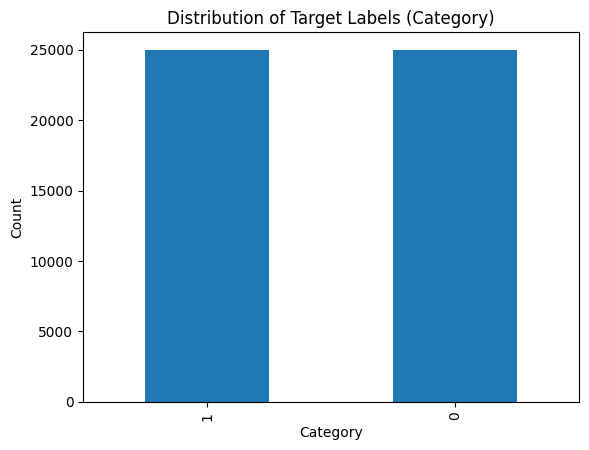

In [10]:
#check the distribution of 'Category' and see whether the Target labels are balanced or not.
# Checking the distribution of the 'Category' column
category_distribution = df['Category'].value_counts()

# Printing the distribution
print(category_distribution)

# Optionally, plotting the distribution
import matplotlib.pyplot as plt

category_distribution.plot(kind='bar')
plt.title('Distribution of Target Labels (Category)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



In [13]:
#Do the 'train-test' splitting with test size of 20%
# Assuming 'df' is the dataframe and 'Message' is the text column, and 'Category' is the target column
X = df['review']  # Feature: the text column
y = df['Category']  # Target: the sentiment column

# Splitting the data into training and testing sets with 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can check the shapes of the resulting sets
print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)


Training data size: (40000,)
Test data size: (10000,)


In [14]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text to word counts
    ('rf', RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42))  # Random Forest Classifier
])

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4961
           1       0.85      0.83      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [15]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text to feature vectors
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))  # KNN Classifier
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Making predictions on the test data
y_pred = pipeline.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.65      0.66      4961
           1       0.66      0.67      0.66      5039

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [16]:

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text to feature vectors
    ('nb', MultinomialNB())  # Multinomial Naive Bayes classifier
])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Making predictions on the test data
y_pred = pipeline.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

